# Reload data

In [2]:
import pandas as pd
#df = pd.read_pickle(file_name)
combined = pd.read_pickle('../combined')

In [3]:
combined

,3000010,3000013,3000024,3000027,3000074,3000124,3000149,3000165,3000168,3000174,...,minocycline_mic,nitrofurantoin_mic,piperacillin_mic,piperacillin-tazobactam_mic,polymyxin B_mic,tetracycline_mic,ticarcillin/clavulanate_mic,tigecycline_mic,tobramycin_mic,trimethoprim-sulfamethoxazole_mic
ID,,,,,,,,,,,,,,,,,,,,,
565643.5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565644.5,0,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565646.5,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565648.4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565651.6,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565664.3,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565665.3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565666.3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163395.3,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# set categorical to categorical
(This part should be in the previous)

In [106]:
# find all _ris and assign to categorical
for i in list(combined.columns.values):
    if type(i) != int:
        if "_ris" in i:
            combined[i] = combined[i].astype('category')
            combined[i].cat.set_categories(['R ','I ','S '], inplace = True)
            combined[i].cat.as_ordered()
            combined[i].cat.reorder_categories(['R ','I ','S '], ordered = True, inplace = True)
            print(i)
            
        

amikacin_ris
ampicillin_ris
ampicillin-sulbactam_ris
aztreonam_ris
cefazolin_ris
cefepime_ris
cefotaxime_ris
cefoxitin_ris
ceftazidime_ris
ceftriaxone_ris
cephalothin_ris
ciprofloxacin_ris
colistin_ris
doripenem_ris
doxycycline_ris
ertapenem_ris
erythromycin_ris
gentamicin_ris
imipenem_ris
kanamycin_ris
levofloxacin_ris
meropenem_ris
minocycline_ris
nitrofurantoin_ris
penicillin_ris
piperacillin_ris
piperacillin-tazobactam_ris
polymyxin B_ris
streptomycin_ris
tetracycline_ris
ticarcillin/clavulanate_ris
tigecycline_ris
tobramycin_ris
trimethoprim-sulfamethoxazole_ris
vancomycin_ris


# Visualizing RIS v.s. genotype: first try with imipenem
## heatmap: individual genotype v.s. RIS

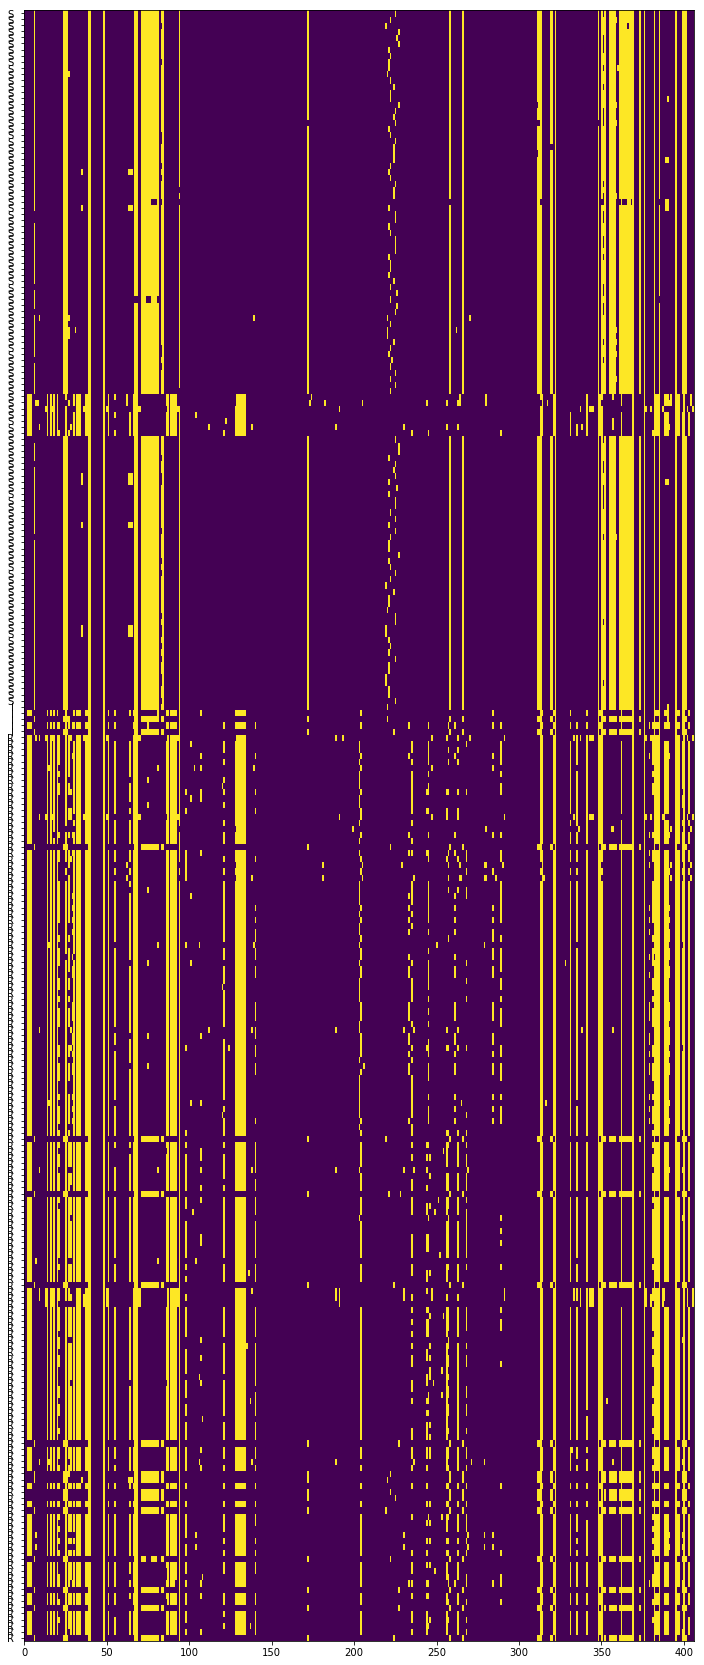

In [107]:
# plotting
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# remove data that imipenem_ris = NaN, and sort according to imipenem_ris
imipenem = combined.loc[pd.isnull(combined['imipenem_ris']) == 0]
imipenem = imipenem.sort_values('imipenem_ris')

#setting the size of the figure
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

#fig = plt.figure()
#plotting heatmap
plt.pcolor(imipenem.iloc[:,0:406])
plt.yticks(np.arange(0.5, len(imipenem.index), 1), list(imipenem['imipenem_ris']))
#mpl.pyplot.xticks(np.arange(0.5, len(geneset.columns), 1), geneset.columns)

#fig.savefig('imipenem.png')


## heatmap: groupby RIS, frequency of each gene

In [108]:
frequency_RIS = imipenem.groupby(['imipenem_ris']).mean()
frequency_RIS

,3000010,3000013,3000024,3000027,3000074,3000124,3000149,3000165,3000168,3000174,...,3003953,3003954,3003962,3003986,3004038,3004039,3004041,3004042,3004043,3004045
imipenem_ris,,,,,,,,,,,,,,,,,,,,,
R,0.0,0.0,0.906040,0.906040,0.906040,0.0,0.080537,0.026846,0.000000,0.046980,...,0.906040,0.0,0.516779,1.0,0.093960,0.033557,0.845638,0.020134,0.033557,0.000000
I,0.0,0.0,0.400000,0.400000,0.400000,0.0,0.600000,0.000000,0.000000,0.000000,...,0.400000,0.0,1.000000,1.0,0.600000,0.000000,0.400000,0.000000,0.000000,0.200000
S,0.0,0.0,0.061404,0.061404,0.061404,0.0,0.868421,0.008772,0.008772,0.017544,...,0.061404,0.0,0.973684,1.0,0.938596,0.008772,0.035088,0.017544,0.008772,0.008772


([<matplotlib.axis.XTick at 0x7fb40469bf60>,
 <a list of 407 Text xticklabel objects>)

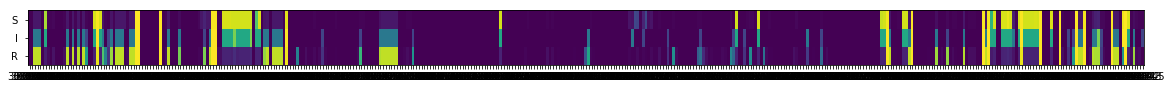

In [109]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 1
plt.rcParams["figure.figsize"] = fig_size
plt.pcolor(frequency_RIS)
plt.yticks(np.arange(0.5, len(frequency_RIS.index), 1), frequency_RIS.index)
plt.xticks(np.arange(0.5, len(frequency_RIS.columns), 1), frequency_RIS.columns)

([<matplotlib.axis.XTick at 0x7fb3fdf70828>,
 <a list of 407 Text xticklabel objects>)

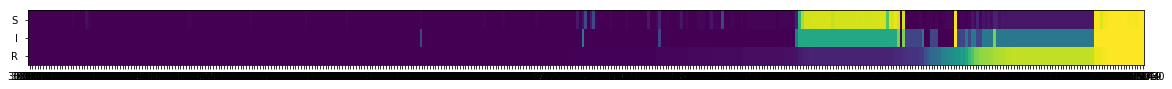

In [120]:
sort_f = frequency_RIS.sort_values('R ', axis = 1)
plt.pcolor(sort_f)
plt.yticks(np.arange(0.5, len(sort_f.index), 1), sort_f.index)
plt.xticks(np.arange(0.5, len(sort_f.columns), 1), sort_f.columns)

# Trying with other drugs: 
## ceftazidime


In [123]:
drug = 'ceftazidime' ### change here and change everything
attr = drug + '_ris'
# remove NaN
df = combined.loc[pd.isnull(combined[attr]) == 0]
# sort with that drug
df = df.sort_values(attr)
# frequency map
frequency_RIS = df.groupby([attr]).mean()
frequency_RIS

,3000010,3000013,3000024,3000027,3000074,3000124,3000149,3000165,3000168,3000174,...,3003953,3003954,3003962,3003986,3004038,3004039,3004041,3004042,3004043,3004045
ceftazidime_ris,,,,,,,,,,,,,,,,,,,,,
R,0.0,0.0,0.979592,0.979592,0.979592,0.0,0.020408,0.034014,0.006803,0.054422,...,0.972789,0.0,0.482993,1.0,0.020408,0.040816,0.904762,0.027211,0.040816,0.000000
I,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S,0.0,0.0,0.033333,0.033333,0.033333,0.0,0.883333,0.000000,0.000000,0.008333,...,0.033333,0.0,0.975000,1.0,0.966667,0.016667,0.008333,0.008333,0.016667,0.016667


([<matplotlib.axis.XTick at 0x7fb4027ede80>,
 <a list of 407 Text xticklabel objects>)

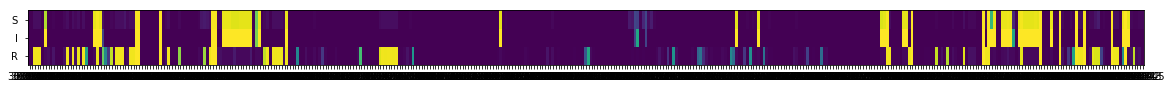

In [124]:
# plot unsorted frequency map
plt.pcolor(frequency_RIS)
plt.yticks(np.arange(0.5, len(frequency_RIS.index), 1), frequency_RIS.index)
plt.xticks(np.arange(0.5, len(frequency_RIS.columns), 1), frequency_RIS.columns)

([<matplotlib.axis.XTick at 0x7fb401fff8d0>,
 <a list of 407 Text xticklabel objects>)

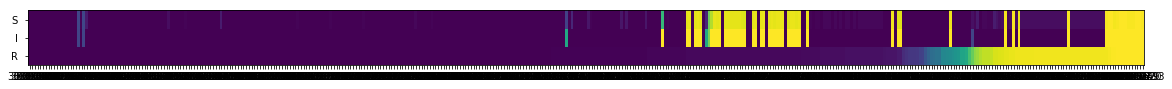

In [125]:
sort_f = frequency_RIS.sort_values('R ', axis = 1)
plt.pcolor(sort_f)
plt.yticks(np.arange(0.5, len(sort_f.index), 1), sort_f.index)
plt.xticks(np.arange(0.5, len(sort_f.columns), 1), sort_f.columns)

# ciprofloxacin

([<matplotlib.axis.XTick at 0x7fb4016abef0>,
 <a list of 407 Text xticklabel objects>)

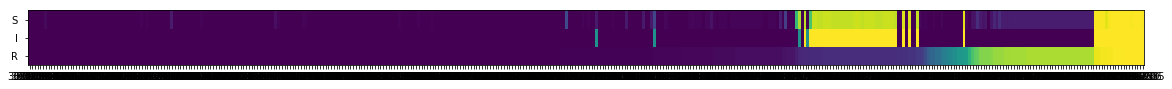

In [126]:
drug = 'ciprofloxacin' ### change here and change everything
attr = drug + '_ris'
# remove NaN
df = combined.loc[pd.isnull(combined[attr]) == 0]
# sort with that drug
df = df.sort_values(attr)
# frequency map
frequency_RIS = df.groupby([attr]).mean()
sort_f = frequency_RIS.sort_values('R ', axis = 1)
plt.pcolor(sort_f)
plt.yticks(np.arange(0.5, len(sort_f.index), 1), sort_f.index)
plt.xticks(np.arange(0.5, len(sort_f.columns), 1), sort_f.columns)

([<matplotlib.axis.XTick at 0x7fb402b89c50>,
 <a list of 407 Text xticklabel objects>)

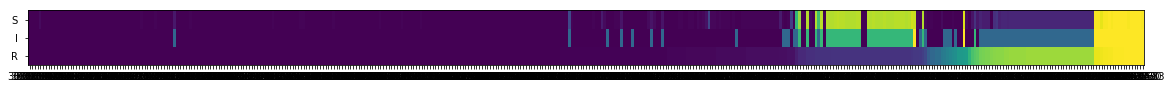

In [127]:
drug = 'levofloxacin' ### change here and change everything
attr = drug + '_ris'
# remove NaN
df = combined.loc[pd.isnull(combined[attr]) == 0]
# sort with that drug
df = df.sort_values(attr)
# frequency map
frequency_RIS = df.groupby([attr]).mean()
sort_f = frequency_RIS.sort_values('R ', axis = 1)
plt.pcolor(sort_f)
plt.yticks(np.arange(0.5, len(sort_f.index), 1), sort_f.index)
plt.xticks(np.arange(0.5, len(sort_f.columns), 1), sort_f.columns)